<a href="https://colab.research.google.com/github/caropilardiaz/Mentoria-Imagenes_Drones/blob/master/3_Pr%C3%A1cticoIAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Diplomatura en Ciencias de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Mentoría Diplomatura en Ciencia de Datos 2020**
### **"Detección del desarrollo del cultivo con imágenes de Drones"**
### **Mentora**: Carolina Del Pilar Díaz

### **Introducción al Aprendizaje Automático**

 
En este laboratorio deben hacer experimentos de regresión y clasificación con el conjunto de datos obtenido en el práctico anterior.

Estudiarán el dataset y seleccionarán atributos relevantes a mano. 

El objetivo consiste en explorar la aplicación de diferentes métodos de aprendizaje supervisado aprendidos en el curso, a través de experimentos reproducibles, y evaluando a su vez la conveniencia de uno u otro, así como la selección de diferentes hiperparámetros a partir del cálculo de las métricas pertinentes. Nuestro objetivo no será construir el mejor modelo, sino ganar un poco más de intuición sobre nuestro conjunto de datos, y tomar algunas decisiones sobre las que profundizaremos en el próximo práctico.

Luego, entrenarán y evaluarán diferentes tipos de regresiones y clasificadores, buscando las configuraciones que mejores resultados den.

### Preprocesamiento
Antes de aplicar los modelos, haremos un filtrado de los datos. Se sugiere seguir los siguientes pasos, pero pueden experimentar ustedes también otras alternativas.ZADOCK y RDTO serán nuestras variables objetivos, sobre la cual buscaremos hacer predicciones las cuáles poseen diferentes distribuciones.

### Crear los siguientes features:
Ciclos; Asignar el valor 0 al ciclo corto y valor 1 al ciclo largo.
Conjunto de datos; Variable binaria construida a partir de asignar 1 correspondiente a la 1° fecha de siembra, o 0 en caso contrario.
Pueden decidir otras configuraciones que necesiten.

### Recordar;
Una vez que el dataset resultante no tenga valores nulos, es necesario transformar las variables categóricas en variables numéricas (es decir, realizar un encoding de los datos) además de convertir longitud,latitud y fechas a numericas.

Más info https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd


### Elección de los modelos
Con los pasos anteriores, nuestro dataset debería ser una tabla con valores numéricos y sin valores nulos. Ahora, deberán separar el conjunto de datos en conjunto de entrenamiento (train) y conjunto de prueba (test). Por ahora, no utilizaremos conjunto de validación. Se recomienda utilizar el método train_test_split de scikitlearn, con un 80% para train y 20% para test.

Una vez divididos los datos, construimos los modelos predictivos. Entrenen cada modelo utilizando el conjunto de entrenamiento y los parámetros por defecto y evaluen la predicción utilizando las cinco métricas descriptas más adelante según corresponda al modelo. 

Es importante recordar, que el dataset posee dos targets con distribuciones diferentes, ZADOK y RDTO.

### Elección de métricas
Un aspecto fundamental del aprendizaje automático es la elección de métricas para evaluar los modelos predictivos según correspondan. En este práctico vamos a explorar las siguientes cinco métricas:
ECM, 
Accuracy,
F1
AUC ROC,
AUC Precision-Recall.

Para cada uno de los modelos que utilicen, calculen las cinco métricas. Pueden encontrar información sobre las últimas dos https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

### División en Entrenamiento y Evaluación
Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [69]:
import pandas as pd
import os


In [87]:
dataset = pd.read_csv('https://raw.githubusercontent.com/luciozarazaga/Mentoria_Imagenes_Drones_Grupo_2/master/dataframelimpio2.csv')

In [88]:
dataset

,RDTO,ZADOCK,Longitude,Latitude,F.Siembra,Ciclos,Variedad,Azul,Verde,InfraRojo,...,T.prom.Madurez,T.min.Madurez,T.max.Madurez,T.suelo.prom.Madurez,T.suelo.min.Madurez,T.suelo.max.Madurez,PP.acum.Madurez,HR.prom.Madurez,HR.min.Madurez,HR.max.Madurez
0,5071,4.1,-2.057.279.013.251.440,-2.120.803.952.044.630,0,1,1,61500,15240,67600,...,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
1,5071,4.1,-2.057.278.886.911.440,-2.120.803.913.170.440,0,1,1,51200,12040,56600,...,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
2,5071,4.1,-2.057.278.760.571.450,-2.120.803.874.297.150,0,1,1,49200,11100,52800,...,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
3,5071,4.1,-2.057.279.181.704.460,-2.120.803.875.107.090,0,1,1,60800,14210,61500,...,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
4,5071,4.1,-2.057.279.056.174.400,-2.120.803.836.232.900,0,1,1,60800,17300,72400,...,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35065,4089,6.9,-2.057.300.450.521.050,-2.120.841.274.112.670,1,0,20,54500,11010,55600,...,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80
35066,4089,6.9,-2.057.300.871.654.060,-2.120.841.274.922.600,1,0,20,72800,14900,91300,...,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80
35067,4089,6.9,-2.057.300.745.314.070,-2.120.841.236.048.410,1,0,20,69200,14480,83100,...,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80
35068,4089,6.9,-2.057.300.618.974.080,-2.120.841.197.175.120,1,0,20,61000,11930,61900,...,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80


In [89]:
dataset=dataset.drop(['Longitude','Latitude', 'Fecha_x','Fecha_y','F_Espigazon'	,'F.Madurez'],axis=1)

In [90]:
dataset

,RDTO,ZADOCK,F.Siembra,Ciclos,Variedad,Azul,Verde,InfraRojo,Borde rojo,Rojo,...,T.prom.Madurez,T.min.Madurez,T.max.Madurez,T.suelo.prom.Madurez,T.suelo.min.Madurez,T.suelo.max.Madurez,PP.acum.Madurez,HR.prom.Madurez,HR.min.Madurez,HR.max.Madurez
0,5071,4.1,0,1,1,61500,15240,67600,37480,15126,...,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
1,5071,4.1,0,1,1,51200,12040,56600,32190,14291,...,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
2,5071,4.1,0,1,1,49200,11100,52800,28610,12364,...,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
3,5071,4.1,0,1,1,60800,14210,61500,36550,13741,...,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
4,5071,4.1,0,1,1,60800,17300,72400,46270,19275,...,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35065,4089,6.9,1,0,20,54500,11010,55600,26940,13987,...,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80
35066,4089,6.9,1,0,20,72800,14900,91300,38220,17056,...,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80
35067,4089,6.9,1,0,20,69200,14480,83100,35950,17149,...,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80
35068,4089,6.9,1,0,20,61000,11930,61900,28170,14329,...,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80


In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [72]:
import os
import math

In [10]:
#from google.colab import drive
#drive.mount('/content/drive')

In [91]:
# División entre instancias y etiquetas
X, y = dataset.iloc[:, 2:], dataset.RDTO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train.shape, X_test.shape

((28056, 46), (7014, 46))

### **1.Regresión**

### **1.1.Regresión Lineal**

Elegir un atributo para el target "RDTO", instancie una regresión lineal,evaluar ECM de train y test, grafique el modelo junto a los puntos de train y test.Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- De acuerdo al heatmap presentado en el práctico 1, se decide utilizar el índice de vegetación NDRE para ajustar el modelo de regresión lineal sobre el Rendimiento. En primer lugar se grafica un scatterplot entre Rendimiento y NDRE
.

Text(0.5, 1.0, 'ScatterPlot Rendimiento vs NDVI')

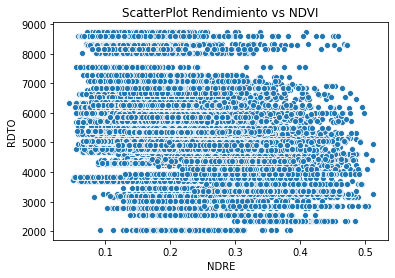

In [12]:
sns.scatterplot(dataset["NDRE"], dataset.RDTO)
plt.title("ScatterPlot Rendimiento vs NDVI")


In [13]:
feature = "NDRE"

X_train_f = X_train.loc[:, feature].values.reshape(-1,1)
X_test_f = X_test.loc[:, feature].values.reshape(-1,1)
X_train_f.shape, X_test_f.shape

((28056, 1), (7014, 1))

In [14]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train_f, y_train)

print(linear_model.coef_, linear_model.intercept_)

[-6180.15934688] 6719.347611358552


In [16]:
pred_y_train = linear_model.predict(X_train_f) 
pred_y_test = linear_model.predict(X_test_f) 

train_error = mean_squared_error(y_train, pred_y_train)
test_error = mean_squared_error(y_test, pred_y_test)

RMSE_train=math.sqrt(train_error)
RMSE_test=math.sqrt(test_error)

RMSEr_test=(RMSE_test/dataset["RDTO"].mean())
RMSEr_train=(RMSE_train/dataset["RDTO"].mean())

print(f'Train error: {train_error:.2f}')
print(f'Test error: {test_error:.2f}')

print(f'RMSE Train:{RMSE_train:.2f}')
print(f'RMSE Test:{RMSE_test:.2f}')

print(f'RMSE Relativo a la media Train:{RMSEr_train:.2f}')
print(f'RMSE Relativo a la media Test:{RMSEr_test:.2f}')



Train error: 1340202.23
Test error: 1332159.34
RMSE Train:1157.67
RMSE Test:1154.19
RMSE Relativo a la media Train:0.22
RMSE Relativo a la media Test:0.22


In [17]:
print('Coefficient of determination for training set prediction: %.2f'
      % r2_score(y_train, pred_y_train))

print('Coefficient of determination for testing set test: %.2f'
      % r2_score(y_test, pred_y_test))

Coefficient of determination for training set prediction: 0.14
Coefficient of determination for testing set test: 0.15


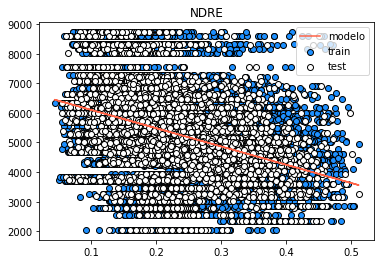

In [18]:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.plot(X_train_f, pred_y_train, color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")

plt.title(feature)
plt.legend()
plt.show()

- En primer lugar, en el práctico 1 (AyVD) se pudo observar que la correlación de Pearson entre el Rendimiento y el atributo NDRE era solo de -0.38. En segundo lugar, el scatterplot presentado anteriormente muestra una elevada dispersión de las observaciones. Esto último implica (en un problema de regresión) que el ajuste del modelo, medido por el coeficiente R2, no será "bueno", en tanto el el error cuadratico medio será elevado. Efectivamente esto es lo que se observa tanto en el conjunto de entrenamiento como en el conjunto de prueba.

### **1.2.Regresión Polinomial**

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando scikit-learn.Deben usar el mismo atributo seleccionado para el ejercicio anterior.Instancie y entrene, prediga y calcule error train y test, imprima valores, guarde errores.
Grafique las curvas de error en términos del grado del polinomio.
Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.Interprete el resultado.

In [19]:
train_errors = []
test_errors = []
pol_models = []
degrees = range(10)
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    
    pol_models.append(model)

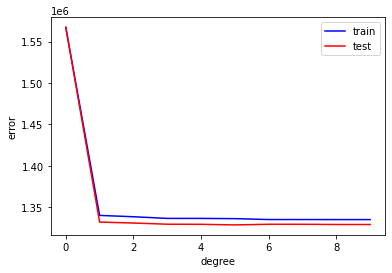

In [20]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")

plt.legend()
plt.xlabel("degree")
plt.ylabel("error")

plt.show()

- El modelo de regresión que mejor funciona es el lineal. Un regresión (polinomial) de grado mayor a 1 resultaría en un sobreajuste del modelo. Estos resultados son congruentes con lo observado en el apartado anterior. Una complejización del modelo no lleva a mejores resultados con la capacidad explicativa del atributo utilizado en baja.

### **1.3.Regresión con más de un atributo**

Seleccione dos o tres atributos entre los más relevantes.
Repita el ejercicio anterior, pero usando los atributos seleccionados.
Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

- Para seleccionar features adicionales se tiene en cuenta los índices de vegetación son funciones de las bandas espectrales, por lo que algunos de ellos, al estar computados de manera similar, están significativamente correlacionados. Para evitar realizar una regresión utilizando features que tengan comportamientos parecidos, se realiza un heatmap para ver que tan fuerte es la correlación entre estos.

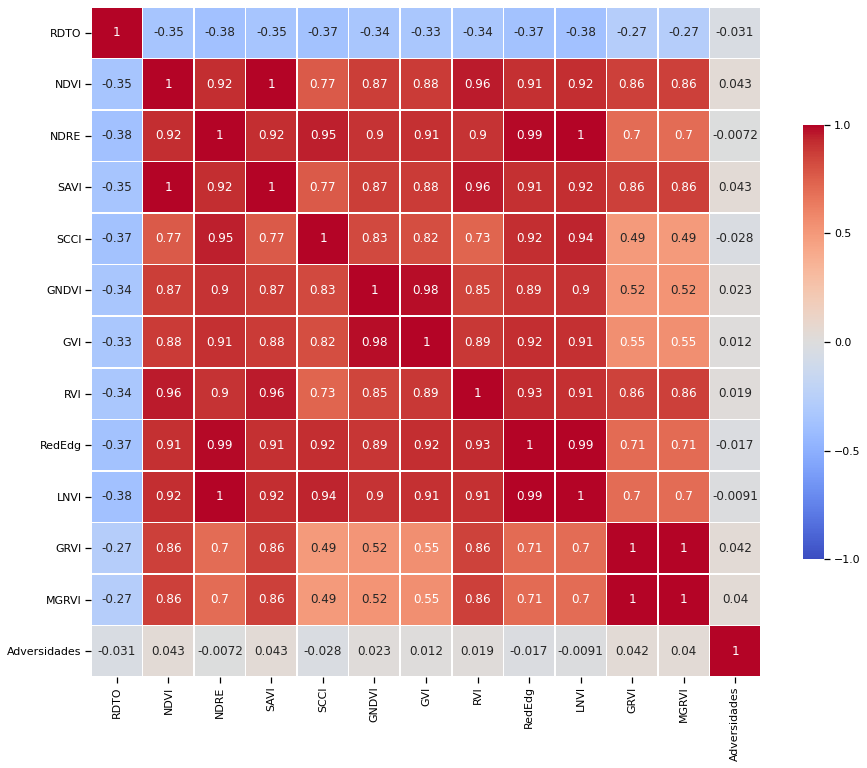

In [21]:
sns.set_context("notebook")
hm = dataset.iloc[:, [0,10,11,12,13,14,15,16,17,18,19,20,21]]
#HEATMAP

corr_matrix1 = hm.corr()

f, ax = plt.subplots(figsize=(15, 20))
heatmap = sns.heatmap(corr_matrix1,
                      square = True,
                      linewidths = .5,
                      cmap = "coolwarm",
                      cbar_kws = {'shrink': .4, 
                                "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix1.columns, rotation = 0)
ax.set_xticklabels(corr_matrix1.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


- Dado lo observado en este gráfico y lo observado en el práctico 1 (AyVD), se utilizarán los features NDVI,  NDRE, GRVI.






In [22]:
# Con tres atributos fs:
features = ["NDVI", "NDRE", "GRVI"]

X_train_fs = X_train.loc[:, features]
X_test_fs = X_test.loc[:, features]
X_train_fs.shape, X_test_fs.shape



((28056, 3), (7014, 3))

In [23]:
train_errors_m = []
test_errors_m = []
degrees_2 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees_2:
    # train:
    multi_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    mr = multi_model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred_m = mr.predict(X_train_fs)
    y_test_pred_m = mr.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred_m)
    test_error = mean_squared_error(y_test, y_test_pred_m)
    train_errors_m.append(train_error)
    test_errors_m.append(test_error)

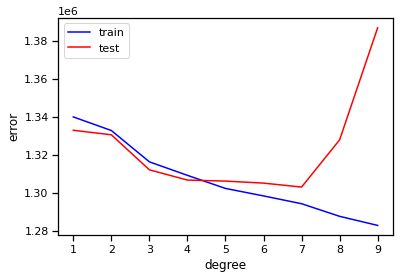

In [24]:
plt.plot(degrees_2, train_errors_m, color="blue", label="train")
plt.plot(degrees_2, test_errors_m, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

In [25]:
degree_m = 3
mult_model = make_pipeline(PolynomialFeatures(degree_m), LinearRegression())

mult_model.fit(X_train_fs, y_train)

# Predecir y evaluar
pred_y_train_mult = mult_model.predict(X_train_fs) 
pred_y_test_mult = mult_model.predict(X_test_fs) 

train_error_mult = mean_squared_error(y_train, pred_y_train_mult)
test_error_mult = mean_squared_error(y_test, pred_y_test_mult)

RMSE_train_error_mult=math.sqrt(train_error_mult)
RMSE_test_error_mult=math.sqrt(test_error_mult)

RMSEr_test=(RMSE_test_error_mult/dataset["RDTO"].mean())
RMSEr_train=(RMSE_train_error_mult/dataset["RDTO"].mean())



print(f'Train error: {train_error_mult:.2f}')
print(f'Test error: {test_error_mult:.2f}')

print(f'RMSE train:{RMSE_train_error_mult:.2f}')
print(f'RMSE test:{RMSE_test_error_mult:.2f}')

print(f'RMSE Relativo a la media test:{RMSEr_test:.2f}')
print(f'RMSE Relativo a la media train:{RMSEr_train:.2f}')


Train error: 1316292.04
Test error: 1312093.96
RMSE train:1147.30
RMSE test:1145.47
RMSE Relativo a la media test:0.21
RMSE Relativo a la media train:0.22


In [26]:
print('Coefficient of determination for training set prediction: %.2f'
      % r2_score(y_train, pred_y_train_mult))

print('Coefficient of determination for testing set prediction: %.2f'
      % r2_score(y_test, pred_y_test_mult))

Coefficient of determination for training set prediction: 0.16
Coefficient of determination for testing set prediction: 0.16


### **1.4.Regresión múltiple. Completa**
Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

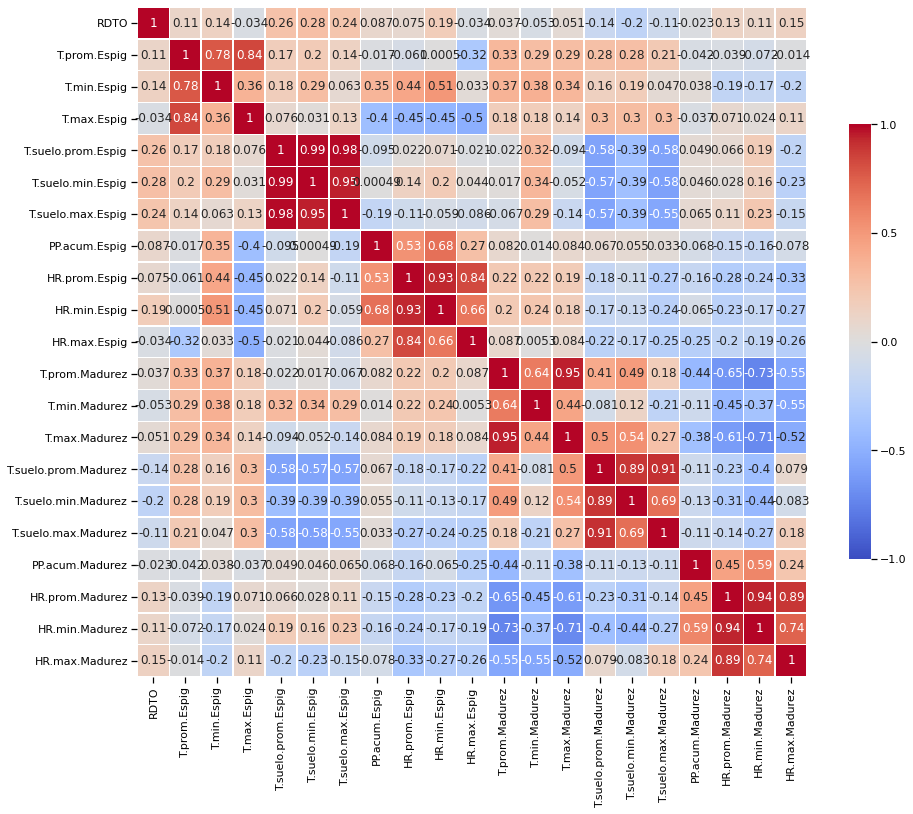

In [27]:
hm2 = dataset.iloc[:, [0, 28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]]

#'T.prom.Espig', 'T.min.Espig','T.max.Espig', 'T.suelo.prom.Espig', 'T.suelo.min.Espig',
#'T.suelo.max.Espig', 'PP.acum.Espig', 'HR.prom.Espig', 'HR.min.Espig',
#'HR.max.Espig', 'Fecha_y', 'T.prom.Madurez', 'T.min.Madurez',
#'T.max.Madurez', 'T.suelo.prom.Madurez', 'T.suelo.min.Madurez','T.suelo.max.Madurez', 
#'PP.acum.Madurez', 'HR.prom.Madurez','HR.min.Madurez', 'HR.max.Madurez

#HEATMAP

corr_matrix2 = hm2.corr()

f, ax = plt.subplots(figsize=(15, 20))
heatmap = sns.heatmap(corr_matrix2,
                      square = True,
                      linewidths = .5,
                      cmap = "coolwarm",
                      cbar_kws = {'shrink': .4, 
                                "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix2.columns, rotation = 0)
ax.set_xticklabels(corr_matrix2.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


In [28]:
# Con todos los atributos fs:
features_m =['F.Siembra', 'Ciclos', 'Variedad', 'Azul', 'Verde',
       'InfraRojo', 'Borde rojo', 'Rojo', 'NDVI', 'NDRE', 'SAVI', 'SCCI',
       'GNDVI', 'GVI', 'RVI', 'RedEdg', 'LNVI', 'GRVI', 'MGRVI',
       'Adversidades', 'Dias.entre.fechas', 'Aspecto', 'Roya_cat',
       'Carbon_cat', 'Fusariosis_cat', 'ManchasFoliares_cat', 'T.prom.Espig',
       'T.min.Espig', 'T.max.Espig', 'T.suelo.prom.Espig', 'T.suelo.min.Espig',
       'T.suelo.max.Espig', 'PP.acum.Espig', 'HR.prom.Espig', 'HR.min.Espig',
       'HR.max.Espig', 'T.prom.Madurez', 'T.min.Madurez', 'T.max.Madurez',
       'T.suelo.prom.Madurez', 'T.suelo.min.Madurez', 'T.suelo.max.Madurez',
       'PP.acum.Madurez', 'HR.prom.Madurez', 'HR.min.Madurez',
       'HR.max.Madurez']

X_train_fs_m = X_train.loc[:,features_m]
X_test_fs_m = X_test.loc[:,features_m]
X_train_fs_m.shape, X_test_fs_m.shape

((28056, 46), (7014, 46))

In [29]:
degree_m = 1
mult_model = make_pipeline(PolynomialFeatures(degree_m), LinearRegression())

mult_model.fit(X_train_fs_m, y_train)

# Predecir y evaluar
pred_y_train_mult = mult_model.predict(X_train_fs_m) 
pred_y_test_mult = mult_model.predict(X_test_fs_m) 

train_error_mult = mean_squared_error(y_train, pred_y_train_mult)
test_error_mult = mean_squared_error(y_test, pred_y_test_mult)

RMSE_train_error_mult=math.sqrt(train_error_mult)
RMSE_test_error_mult=math.sqrt(test_error_mult)

RMSEr_test=(RMSE_test_error_mult/dataset["RDTO"].mean())
RMSEr_train=(RMSE_train_error_mult/dataset["RDTO"].mean())



print(f'Train error: {train_error_mult:.2f}')
print(f'Test error: {test_error_mult:.2f}')

print(f'RMSE train:{RMSE_train_error_mult:.2f}')
print(f'RMSE test:{RMSE_test_error_mult:.2f}')

print(f'RMSE Relativo a la media train:{RMSEr_train:.2f}')
print(f'RMSE Relativo a la media test:{RMSEr_test:.2f}')





Train error: 526798.65
Test error: 523881.17
RMSE train:725.81
RMSE test:723.80
RMSE Relativo a la media train:0.14
RMSE Relativo a la media test:0.14


In [ ]:
"""degree_m = 3
mult_model = make_pipeline(PolynomialFeatures(degree_m), LinearRegression())

mult_model.fit(X_train_fs_m, y_train)

# Predecir y evaluar
pred_y_train_mult = mult_model.predict(X_train_fs_m) 
pred_y_test_mult = mult_model.predict(X_test_fs_m) 

train_error_mult = mean_squared_error(y_train, pred_y_train_mult)
test_error_mult = mean_squared_error(y_test, pred_y_test_mult)

RMSE_train_error_mult=math.sqrt(train_error_mult)
RMSE_test_error_mult=math.sqrt(test_error_mult)

RMSEr_test=(RMSE_test_error_mult/dataset["RDTO"].mean())
RMSEr_train=(RMSE_train_error_mult/dataset["RDTO"].mean())
    

print(f'Train error: {train_error:.2f}')
print(f'Test error: {test_error:.2f}')

print(f'RMSE train:{RMSE_train_error:.2f}')
print(f'RMSE test:{RMSE_test_error:.2f}')

print(f'RMSE Relativo a la media train:{RMSEr_train:.2f}')
print(f'RMSE Relativo a la media test:{RMSEr_test:.2f}')

    


### **1.5.Regularización**
Utilizar diferentes valores de alpha. ¿Mejora?

In [30]:
ridge = Ridge(alpha= 10)
ridge.fit(X_train_fs_m, y_train)

print(ridge.coef_, ridge.intercept_)

[ 2.28026207e+03 -1.38884795e+02  1.21758963e+01 -2.09130027e-02
 -3.37199985e-02  2.72319696e-03 -3.81478534e-02  1.64871249e-01
  4.92357651e+02  1.04093824e+02  7.38969668e+02  3.99686757e+02
 -2.63617979e+02 -3.63928578e+01  3.11718315e+01 -8.46446200e+02
  8.12239074e+01  6.07604408e+02  9.19737698e+02 -6.77183434e+01
 -1.19150222e+02 -2.44802274e+01 -3.79777156e+02 -5.19823603e+02
  3.45412853e+01 -2.03062361e+01 -1.45476057e+02  2.20808517e+02
  4.08933790e+01  3.12675680e+03 -2.12074000e+03 -8.44205528e+02
 -4.58674883e+01  1.56944413e+01  4.33417508e+01 -6.07550069e+01
  1.73697769e+02 -2.12670834e+02  1.63680524e+02 -1.54068305e+03
  7.97854175e+02  5.97448946e+02  4.51795458e+01  5.92556384e+00
 -1.01232246e+02  7.85372731e+01] -3500.345148316077


In [32]:
pred_y_train_ridge = ridge.predict(X_train_fs_m) 
pred_y_test_ridge = ridge.predict(X_test_fs_m) 

train_error_ridge = mean_squared_error(y_train, pred_y_train_ridge)
test_error_ridge = mean_squared_error(y_test, pred_y_test_ridge)

RMSE_train_error_ridge=math.sqrt(train_error_ridge)
RMSE_test_error_ridge=math.sqrt(test_error_ridge)

RMSEr_test=(RMSE_test_error_ridge/dataset["RDTO"].mean())
RMSEr_train=(RMSE_train_error_ridge/dataset["RDTO"].mean())

print(f'Train error: {train_error:.2f}')
print(f'Test error: {test_error:.2f}')

print(f'RMSE train:{RMSE_train_error_ridge:.2f}')
print(f'RMSE test:{RMSE_test_error_ridge:.2f}')

print(f'RMSE Relativo a la media train:{RMSEr_train:.2f}')
print(f'RMSE Relativo a la media test:{RMSEr_test:.2f}')



Train error: 1282830.47
Test error: 1386879.56
RMSE train:731.15
RMSE test:727.24
RMSE Relativo a la media train:0.14
RMSE Relativo a la media test:0.14


In [31]:
train_errors = []
test_errors = []
ridge_models = []
alphas = [0.1, 0.2, 0.4, 0.75, 1, 1.5, 2, 4, 6, 8, 10]
for alpha_i in alphas:
    # train:
    model = Ridge(alpha= alpha_i)
    model.fit(X_train_fs_m, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs_m)
    y_test_pred = model.predict(X_test_fs_m)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    
    ridge_models.append(model)

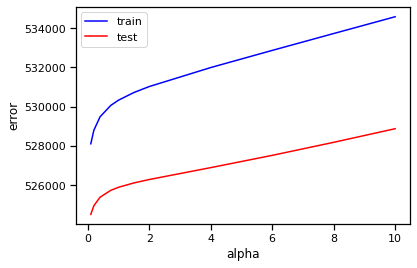

In [32]:
plt.plot(alphas, train_errors, color="blue", label="train")
plt.plot(alphas, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("error")
plt.show()

### **2.Regresion**


### **2.1.SGDRegressor con selección de hiperparámetros**. 

Probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.Usar grid-search y 5-fold cross-validation. Reportar métricas y varianzas.Reportar accuracy promedio y varianza para todas las configuraciones, evaluar sobre el conjunto de entrenamiento y sobre el conjunto de evaluación, reportando:

Accuracy
Precision
Recall
F1
matriz de confusión
Documentación:

In [35]:
param_grid = {
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'eta0':[0.1,0.001,0.01,0.1,1],
    'learning_rate': ['constant','optimal','invscaling','adaptive'],
    'penalty' : ['l2', 'l1', 'elasticnet'],
    'max_iter': [3000]
}


In [42]:
"""SGDrg = SGDRegressor(random_state=0)

cv = GridSearchCV(SGDrg, param_grid, scoring='neg_mean_squared_error',cv=5)

cv.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linea

In [43]:
"""results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']




0      1.224521e+41
1      1.640868e+41
2      1.512945e+41
3      3.598262e+15
4      2.648455e+15
           ...     
235    5.337257e+11
236    3.987627e+08
237    1.635354e+32
238    9.298397e+34
239    1.395163e+32
Name: mean_test_score, Length: 240, dtype: float64

In [45]:
""""df = pd.DataFrame(results)
df[['param_loss', 'param_penalty', 'param_eta0','mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')


,param_loss,param_penalty,param_eta0,mean_test_score,std_test_score,rank_test_score
88,huber,l1,0.001,-1.487460e+06,1.195382e+05,1
89,huber,elasticnet,0.001,-1.631886e+06,1.038893e+05,2
87,huber,l2,0.001,-1.733702e+06,2.807667e+05,3
135,huber,l2,0.01,-1.970185e+06,3.648180e+05,4
137,huber,elasticnet,0.01,-2.168188e+06,6.119701e+05,5
...,...,...,...,...,...,...
194,squared_loss,elasticnet,1,-1.156400e+43,2.151489e+43,236
201,squared_epsilon_insensitive,l2,1,-1.211968e+43,2.116805e+43,237
192,squared_loss,l2,1,-1.211968e+43,2.116805e+43,238
202,squared_epsilon_insensitive,l1,1,-1.640868e+43,2.962026e+43,239


In [46]:
### Miramos el Mejor Modelos ####
"""best_model = cv.best_estimator_
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='huber', max_iter=3000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [47]:
### Predecimos con el mejor modelo ####
"""y_train_pred_best_model = best_model.predict(X_train)
y_test_pred_best_model = best_model.predict(X_test)

### evaluate:
train_error_bm = mean_squared_error(y_train, y_train_pred_best_model)
test_error_bm = mean_squared_error(y_test, y_test_pred_best_model)

RMSE_train_error_bm=math.sqrt(train_error_bm)
RMSE_test_error_bm=math.sqrt(test_error_bm)

RMSEr_train_error_bm=(RMSE_train_error_bm/dataset["RDTO"].mean())
RMSEr_test_error_bm=(RMSE_test_error_bm/dataset["RDTO"].mean())


print(f'Train error: {train_error_bm:.2f}')
print(f'Test error: {test_error_bm:.2f}')

print(f'RMSE train:{RMSE_train_error_bm:.2f}')
print(f'RMSE test:{RMSE_test_error_bm:.2f}')

print(f'RMSE relativo test:{RMSEr_test_error_bm:.2f}')
print(f'RMSE relativo train:{RMSEr_train_error_bm:.2f}')

    



Train error: 2192076.86
Test error: 2139110.35
RMSE train:1480.57
RMSE test:1462.57
RMSE relativo test:0.27
RMSE relativo train:0.28


###**2.2.DecisionTreeRegressor**. 
Idem anterior

In [34]:
#Definimos grilla
param_grid2 = { 'criterion'        : ['mse', 'friedman_mse', 'mae'],
              'splitter'         : ['best','random'],
              'max_depth'        : [5,10,15,20,25,30,35], 
              'max_features'     : ["auto", "sqrt", "log2"] 
}


In [36]:
"""DTreg = DecisionTreeRegressor(random_state = 0)

cv = GridSearchCV(DTreg, param_grid2, scoring='neg_mean_squared_error', cv=5) 
cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [5, 10, 15, 20, 25, 30, 35],
                         'max_features': ['auto', 'sqrt', 'log2'],

In [38]:
"""results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

In [39]:
"""df = pd.DataFrame(results)
df[['param_criterion', 'param_splitter', 'param_max_depth','param_max_features','mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')


,param_criterion,param_splitter,param_max_depth,param_max_features,mean_test_score,std_test_score,rank_test_score
55,friedman_mse,random,15,auto,-7.035806e+04,7274.144041,1
13,mse,random,15,auto,-7.035806e+04,7274.144041,1
103,mae,random,20,auto,-7.377879e+04,3151.897121,3
109,mae,random,25,auto,-7.570302e+04,9198.684066,4
12,mse,best,15,auto,-7.596852e+04,3280.609568,5
...,...,...,...,...,...,...,...
45,friedman_mse,random,5,sqrt,-9.103667e+05,27681.009078,121
87,mae,random,5,sqrt,-9.892210e+05,140277.410431,123
47,friedman_mse,random,5,log2,-1.051404e+06,30761.579440,124
5,mse,random,5,log2,-1.051404e+06,30761.579440,124


In [68]:
### Miramos el Mejor Modelos ####
best_model2 = cv.best_estimator_
best_model2

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='random')

In [43]:
y_train_pred_best_model2 = best_model2.predict(X_train)
y_test_pred_best_model2 = best_model2.predict(X_test)

### evaluate:
train_error_bm2 = mean_squared_error(y_train, y_train_pred_best_model2)
test_error_bm2 = mean_squared_error(y_test, y_test_pred_best_model2)

RMSE_train_error_bm2=math.sqrt(train_error_bm2)
RMSE_test_error_bm2=math.sqrt(test_error_bm2)

RMSEr_train_error_bm2=(RMSE_train_error_bm2/dataset["RDTO"].mean())
RMSEr_test_error_bm2=(RMSE_test_error_bm2/dataset["RDTO"].mean())


print(f'Train error: {train_error_bm2:.2f}')
print(f'Test error: {test_error_bm2:.2f}')

print(f'RMSE train:{RMSE_train_error_bm2:.2f}')
print(f'RMSE test:{RMSE_test_error_bm2:.2f}')

print(f'RMSE relativo test:{RMSEr_test_error_bm2:.2f}')
print(f'RMSE relativo train:{RMSEr_train_error_bm2:.2f}')

Train error: 22615.40
Test error: 86802.72
RMSE train:150.38
RMSE test:294.62
RMSE relativo test:0.06
RMSE relativo train:0.03


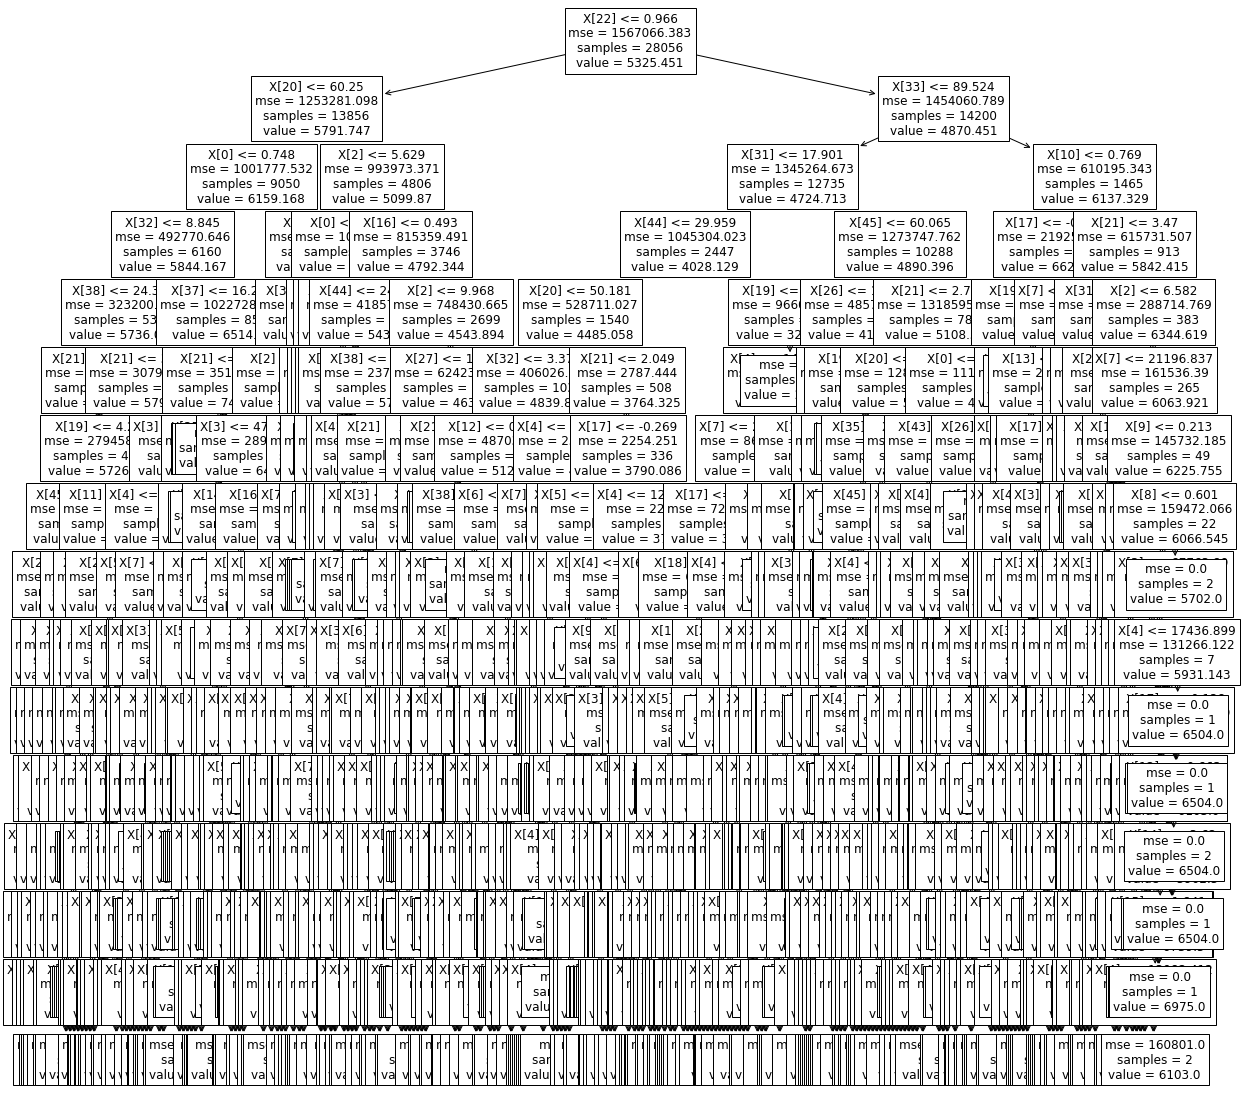

In [79]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(best_model2,max_depth=15,fontsize=12);

Text(0.5, 1.0, 'Observados vs Predichos - Set Train')

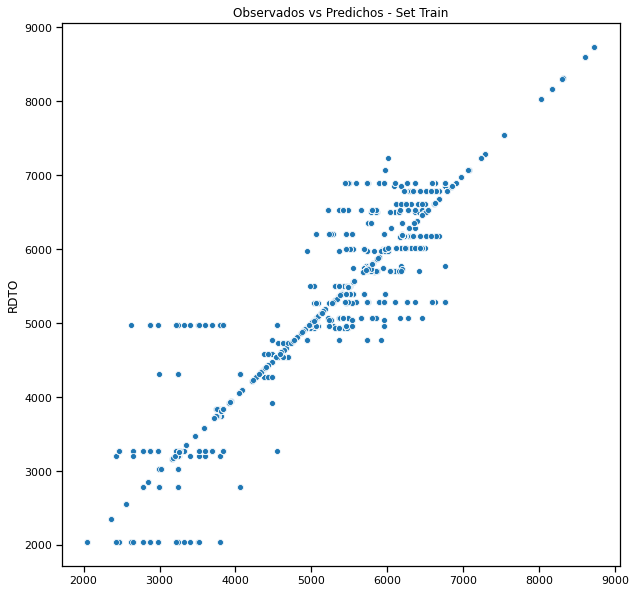

In [91]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_train_pred_best_model2,y=y_train)
plt.title("Observados vs Predichos - Set Train")

Text(0.5, 1.0, 'Observados vs Predichos - Set Test')

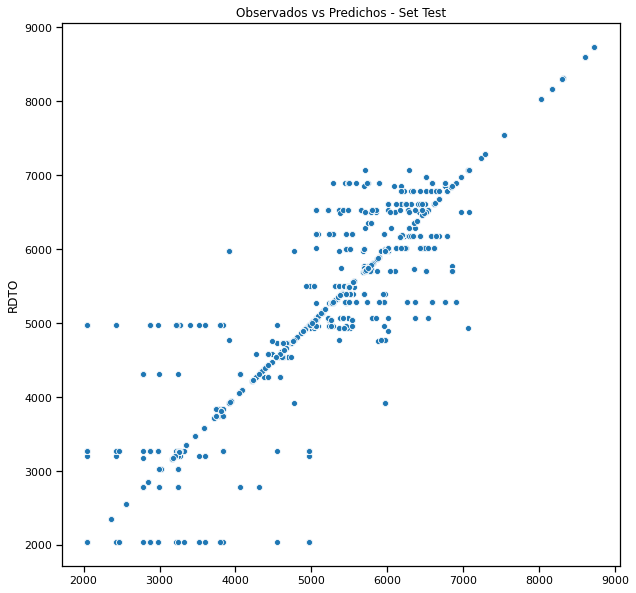

In [92]:
plt.figure(figsize=(10,10))
ax2=sns.scatterplot(x=y_test_pred_best_model2,y=y_test)
plt.title("Observados vs Predichos - Set Test")

###**2.3.Random Forest**
idem anterior

In [13]:
model = RandomForestRegressor(random_state=2)
model.fit(X_train, y_train)




RandomForestRegressor(random_state=2)

In [14]:
###Predicciones
y_train_pred_model = model.predict(X_train)
y_test_pred_model = model.predict(X_test)
####evaluate:
train_error_rf1 = mean_squared_error(y_train, y_train_pred_model)
test_error_rf1 = mean_squared_error(y_test, y_test_pred_model)

RMSE_train_error_rf1=math.sqrt(train_error_rf1)
RMSE_test_error_rf1=math.sqrt(test_error_rf1)

RMSEr_train_error_rf1=(RMSE_train_error_rf1/dataset["RDTO"].mean())
RMSEr_test_error_rf1=(RMSE_test_error_rf1/dataset["RDTO"].mean())


print(f'Train error: {train_error_rf1:.2f}')
print(f'Test error: {test_error_rf1:.2f}')

print(f'RMSE train:{RMSE_train_error_rf1:.2f}')
print(f'RMSE test:{RMSE_test_error_rf1:.2f}')

print(f'RMSE relativo test:{RMSEr_test_error_rf1:.2f}')
print(f'RMSE relativo train:{RMSEr_train_error_rf1:.2f}')

Train error: 6647.54
Test error: 55105.91
RMSE train:81.53
RMSE test:234.75
RMSE relativo test:0.04
RMSE relativo train:0.02


In [21]:
importancia=pd.concat((pd.DataFrame(X_train.iloc[:, 0:].columns, columns = ['variable']), 
           pd.DataFrame(model.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values('importance',ascending=False)
importancia

,variable,importance
31,T.suelo.max.Espig,0.221199
33,HR.prom.Espig,0.182820
0,F.Siembra,0.055722
21,Aspecto,0.054434
1,Ciclos,0.046799
2,Variedad,0.044847
35,HR.max.Espig,0.042862
19,Adversidades,0.040202
43,HR.prom.Madurez,0.040157
44,HR.min.Madurez,0.024791


Text(0.5, 1.0, 'Importancia de las variables')

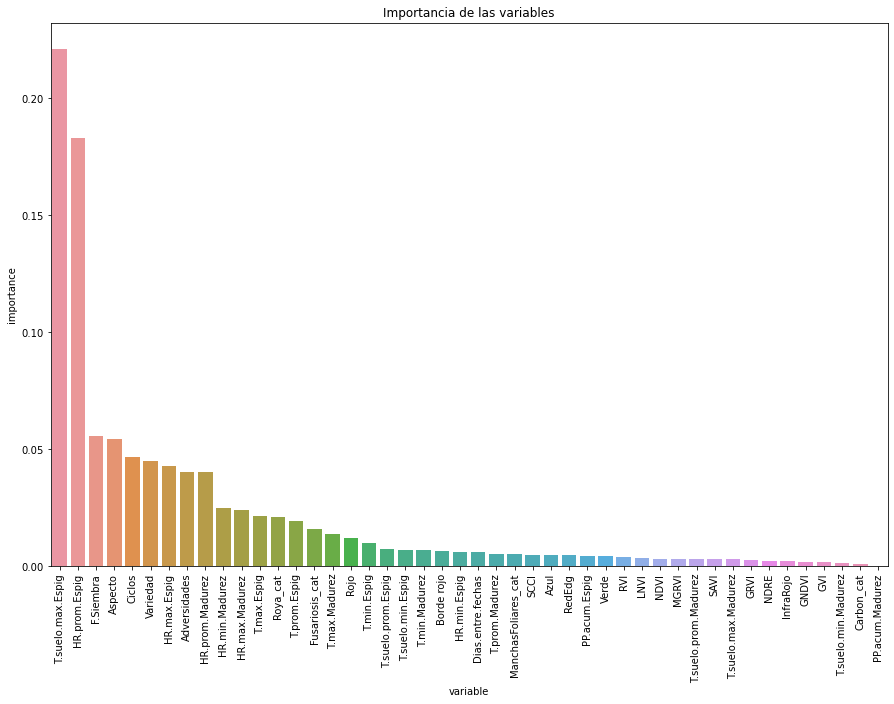

In [53]:
plt.figure(figsize=(15,10))
grafico=sns.barplot(x='variable', y='importance', data=importancia)
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=90)
plt.title("Importancia de las variables")




In [92]:
####### Normalizamos los datos y probamos los "mejores modelos"
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train.shape, X_test.shape





((28056, 46), (7014, 46))

In [93]:
## Probamos el SGDR
SGDR2=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='huber', max_iter=3000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [94]:
### fit
SGDR2.fit(X_train,y_train)

### predict
y_train_pred_sgdr2 = SGDR2.predict(X_train)
y_test_pred_sgdr2 = SGDR2.predict(X_test)

### evaluate:
train_error_sgdr2 = mean_squared_error(y_train, y_train_pred_sgdr2)
test_error_sgdr2 = mean_squared_error(y_test, y_test_pred_sgdr2)

RMSE_train_error_sgdr2=math.sqrt(train_error_sgdr2)
RMSE_test_error_sgdr2=math.sqrt(test_error_sgdr2)

RMSEr_train_error_sgdr2=(RMSE_train_error_sgdr2/dataset["RDTO"].mean())
RMSEr_test_error_sgdr2=(RMSE_test_error_sgdr2/dataset["RDTO"].mean())


print(f'Train error: {train_error_sgdr2:.2f}')
print(f'Test error: {test_error_sgdr2:.2f}')

print(f'RMSE train:{RMSE_train_error_sgdr2:.2f}')
print(f'RMSE test:{RMSE_test_error_sgdr2:.2f}')

print(f'RMSE relativo test:{RMSEr_test_error_sgdr2:.2f}')
print(f'RMSE relativo train:{RMSEr_train_error_sgdr2:.2f}')

Train error: 872003.53
Test error: 875095.54
RMSE train:933.81
RMSE test:935.47
RMSE relativo test:0.18
RMSE relativo train:0.18


C:\Users\franm\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Los errores del modelo con los datos normalizados son menores (0.18 y 0.18), comparados con el modelo sin normalizar cuyo valores son:RMSE relativo test:0.27 y RMSE relativo train:0.28.

In [97]:
#### probamos el arbol de regresion 
DTR2=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='random')

In [98]:
### fit
DTR2.fit(X_train,y_train)

### predict
y_train_pred_dtr2 = DTR2.predict(X_train)
y_test_pred_dtr2 = DTR2.predict(X_test)

### evaluate:
train_error_dtr2 = mean_squared_error(y_train, y_train_pred_dtr2)
test_error_dtr2 = mean_squared_error(y_test, y_test_pred_dtr2)

RMSE_train_error_dtr2=math.sqrt(train_error_dtr2)
RMSE_test_error_dtr2=math.sqrt(test_error_dtr2)

RMSEr_train_error_dtr2=(RMSE_train_error_dtr2/dataset["RDTO"].mean())
RMSEr_test_error_dtr2=(RMSE_test_error_dtr2/dataset["RDTO"].mean())


print(f'Train error: {train_error_dtr2:.2f}')
print(f'Test error: {test_error_dtr2:.2f}')

print(f'RMSE train:{RMSE_train_error_dtr2:.2f}')
print(f'RMSE test:{RMSE_test_error_dtr2:.2f}')

print(f'RMSE relativo test:{RMSEr_test_error_dtr2:.2f}')
print(f'RMSE relativo train:{RMSEr_train_error_dtr2:.2f}')

Train error: 22615.40
Test error: 86802.72
RMSE train:150.38
RMSE test:294.62
RMSE relativo test:0.06
RMSE relativo train:0.03


En este caso los valores entre el modelo con los datos normalizados y sin normalizar, fueron identicos. 

In [101]:
### Probamos el random forest
model2= RandomForestRegressor(random_state=2)


In [102]:
### fit
model2.fit(X_train,y_train)

### predict
y_train_pred_rf2 = model2.predict(X_train)
y_test_pred_rf2 = model2.predict(X_test)

### evaluate:
train_error_rf2 = mean_squared_error(y_train, y_train_pred_rf2)
test_error_rf2 = mean_squared_error(y_test, y_test_pred_rf2)

RMSE_train_error_rf2=math.sqrt(train_error_rf2)
RMSE_test_error_rf2=math.sqrt(test_error_rf2)

RMSEr_train_error_rf2=(RMSE_train_error_rf2/dataset["RDTO"].mean())
RMSEr_test_error_rf2=(RMSE_test_error_rf2/dataset["RDTO"].mean())


print(f'Train error: {train_error_rf2:.2f}')
print(f'Test error: {test_error_rf2:.2f}')

print(f'RMSE train:{RMSE_train_error_rf2:.2f}')
print(f'RMSE test:{RMSE_test_error_rf2:.2f}')

print(f'RMSE relativo test:{RMSEr_test_error_rf2:.2f}')
print(f'RMSE relativo train:{RMSEr_train_error_rf2:.2f}')

Train error: 6643.60
Test error: 55144.22
RMSE train:81.51
RMSE test:234.83
RMSE relativo test:0.04
RMSE relativo train:0.02


En este caso los valores tambien fueron identicos. 

**PROBAMOS LOS MODELOS AL USAR SOLO LAS FEATURES DERIVADAS DE LAS IMAGENES.**


In [111]:
X, y = dataset.iloc[:, 5:21], dataset.RDTO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train.shape, X_test.shape

((28056, 16), (7014, 16))

In [148]:
X_train

,Azul,Verde,InfraRojo,Borde rojo,Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdg,LNVI,GRVI,MGRVI
31427,55600,14260,55900,41620,20409,0.4650,0.1464,0.6976,0.3148,0.5935,3.9200,2.7389,1.3431,0.2949,-0.1773,-0.3439
9298,51800,11870,49700,29090,12483,0.5985,0.2615,0.8977,0.4370,0.6144,4.1870,3.9814,1.7084,0.5356,-0.0251,-0.0503
7919,52700,12970,45800,31330,16925,0.4603,0.1876,0.6905,0.4075,0.5586,3.5312,2.7060,1.4618,0.3797,-0.1322,-0.2600
23512,60900,14120,65700,36510,16918,0.5904,0.2855,0.8856,0.4836,0.6462,4.6529,3.8834,1.7995,0.5875,-0.0901,-0.1788
27292,62100,16310,73200,47950,20532,0.5618,0.2084,0.8428,0.3709,0.6355,4.4880,3.5651,1.5265,0.4230,-0.1145,-0.2262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,50500,12050,57600,30430,14972,0.5873,0.3086,0.8810,0.5254,0.6539,4.7800,3.8471,1.8928,0.6380,-0.1081,-0.2137
32103,57400,13150,57200,35770,18762,0.5060,0.2305,0.7590,0.4555,0.6261,4.3498,3.0487,1.5991,0.4694,-0.1758,-0.3411
30403,49400,12230,46100,32440,16406,0.4750,0.1739,0.7125,0.3661,0.5806,3.7694,2.8099,1.4210,0.3514,-0.1458,-0.2855
21243,53000,11170,43500,26560,14137,0.5094,0.2417,0.7641,0.4746,0.5913,3.8943,3.0770,1.6378,0.4933,-0.1172,-0.2313


In [114]:
### Probamos el SGDR
param_grid = {
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'eta0':[0.1,0.001,0.01,0.1,1],
    'learning_rate': ['constant','optimal','invscaling','adaptive'],
    'penalty' : ['l2', 'l1', 'elasticnet'],
    'max_iter': [3000]
}


In [115]:
SGDrg2 = SGDRegressor(random_state=0)

cv = GridSearchCV(SGDrg2, param_grid, scoring='neg_mean_squared_error',cv=5)

cv.fit(X_train, y_train);

C:\Users\franm\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\franm\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\franm\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\franm\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before 

C:\Users\franm\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\franm\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\franm\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\franm\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before 

C:\Users\franm\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\franm\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\franm\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\franm\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before 

In [117]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

In [118]:
df = pd.DataFrame(results)
df[['param_loss', 'param_penalty', 'param_eta0','mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')


,param_loss,param_penalty,param_eta0,mean_test_score,std_test_score,rank_test_score
231,huber,l2,1,-1.520211e+06,8.926225e+04,1
89,huber,elasticnet,0.001,-1.545224e+06,5.372348e+04,2
88,huber,l1,0.001,-1.550487e+06,9.722044e+04,3
39,huber,l2,0.1,-1.590500e+06,1.356668e+05,4
183,huber,l2,0.1,-1.590500e+06,1.356668e+05,4
...,...,...,...,...,...,...
194,squared_loss,elasticnet,1,-3.654463e+42,4.146430e+42,236
192,squared_loss,l2,1,-1.112502e+43,1.823404e+43,237
201,squared_epsilon_insensitive,l2,1,-1.112502e+43,1.823404e+43,238
202,squared_epsilon_insensitive,l1,1,-1.712536e+43,3.025849e+43,239


In [119]:
best_model2 = cv.best_estimator_
best_model2

SGDRegressor(eta0=1, learning_rate='adaptive', loss='huber', max_iter=3000,
             random_state=0)

In [120]:
y_train_pred_best_model2 = best_model2.predict(X_train)
y_test_pred_best_model2 = best_model2.predict(X_test)

### evaluate:
train_error_bm2 = mean_squared_error(y_train, y_train_pred_best_model2)
test_error_bm2 = mean_squared_error(y_test, y_test_pred_best_model2)

RMSE_train_error_bm2=math.sqrt(train_error_bm2)
RMSE_test_error_bm2=math.sqrt(test_error_bm2)

RMSEr_train_error_bm2=(RMSE_train_error_bm2/dataset["RDTO"].mean())
RMSEr_test_error_bm2=(RMSE_test_error_bm2/dataset["RDTO"].mean())


print(f'Train error: {train_error_bm2:.2f}')
print(f'Test error: {test_error_bm2:.2f}')

print(f'RMSE train:{RMSE_train_error_bm2:.2f}')
print(f'RMSE test:{RMSE_test_error_bm2:.2f}')

print(f'RMSE relativo test:{RMSEr_test_error_bm2:.2f}')
print(f'RMSE relativo train:{RMSEr_train_error_bm2:.2f}')

Train error: 2216252.17
Test error: 2161824.01
RMSE train:1488.71
RMSE test:1470.31
RMSE relativo test:0.28
RMSE relativo train:0.28


In [121]:
### DTRg
param_grid2 = { 'criterion'        : ['mse', 'friedman_mse', 'mae'],
              'splitter'         : ['best','random'],
              'max_depth'        : [5,10,15,20,25,30,35], 
              'max_features'     : ["auto", "sqrt", "log2"] 
}


In [122]:
DTreg2 = DecisionTreeRegressor(random_state = 0)

cvdtr = GridSearchCV(DTreg2, param_grid2, scoring='neg_mean_squared_error', cv=5) 
cvdtr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [5, 10, 15, 20, 25, 30, 35],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [125]:
resultsdtr = cvdtr.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

In [126]:
df = pd.DataFrame(resultsdtr)
df[['param_criterion', 'param_splitter', 'param_max_depth','param_max_features','mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')


,param_criterion,param_splitter,param_max_depth,param_max_features,mean_test_score,std_test_score,rank_test_score
2,mse,best,5,sqrt,-1.307103e+06,36039.005222,1
4,mse,best,5,log2,-1.307103e+06,36039.005222,1
44,friedman_mse,best,5,sqrt,-1.307103e+06,36039.005222,1
46,friedman_mse,best,5,log2,-1.307103e+06,36039.005222,1
0,mse,best,5,auto,-1.309952e+06,41520.872450,5
...,...,...,...,...,...,...,...
121,mae,random,35,auto,-2.561506e+06,68290.809469,122
31,mse,random,30,auto,-2.583562e+06,73498.901677,123
73,friedman_mse,random,30,auto,-2.583617e+06,73537.628683,124
37,mse,random,35,auto,-2.600571e+06,45439.442374,125


In [127]:
best_modeldtr2 = cvdtr.best_estimator_
best_modeldtr2

DecisionTreeRegressor(max_depth=5, max_features='sqrt', random_state=0)

In [128]:
y_train_pred_best_modeldtr2 = best_modeldtr2.predict(X_train)
y_test_pred_best_modeldtr2 = best_modeldtr2.predict(X_test)

### evaluate:
train_error_bmdtr2 = mean_squared_error(y_train, y_train_pred_best_modeldtr2)
test_error_bmdtr2 = mean_squared_error(y_test, y_test_pred_best_modeldtr2)

RMSE_train_error_bmdtr2=math.sqrt(train_error_bmdtr2)
RMSE_test_error_bmdtr2=math.sqrt(test_error_bmdtr2)

RMSEr_train_error_bmdtr2=(RMSE_train_error_bmdtr2/dataset["RDTO"].mean())
RMSEr_test_error_bmdtr2=(RMSE_test_error_bmdtr2/dataset["RDTO"].mean())


print(f'Train error: {train_error_bmdtr2:.2f}')
print(f'Test error: {test_error_bmdtr2:.2f}')

print(f'RMSE train:{RMSE_train_error_bmdtr2:.2f}')
print(f'RMSE test:{RMSE_test_error_bmdtr2:.2f}')

print(f'RMSE relativo test:{RMSEr_test_error_bmdtr2:.2f}')
print(f'RMSE relativo train:{RMSEr_train_error_bmdtr2:.2f}')

Train error: 1275228.86
Test error: 1290706.60
RMSE train:1129.26
RMSE test:1136.09
RMSE relativo test:0.21
RMSE relativo train:0.21


Text(0.5, 1.0, 'Observados vs Predichos - Set Test')

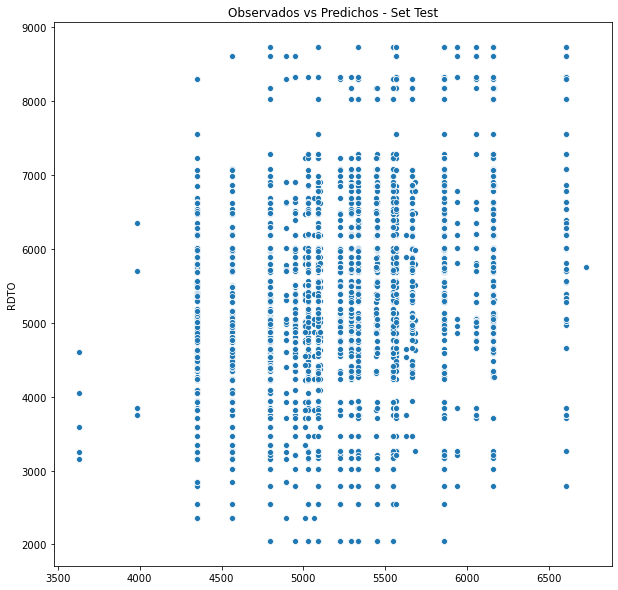

In [129]:
plt.figure(figsize=(10,10))
ax2=sns.scatterplot(x=y_test_pred_best_modeldtr2,y=y_test)
plt.title("Observados vs Predichos - Set Test")

Text(0.5, 1.0, 'Observados vs Predichos - Set Train')

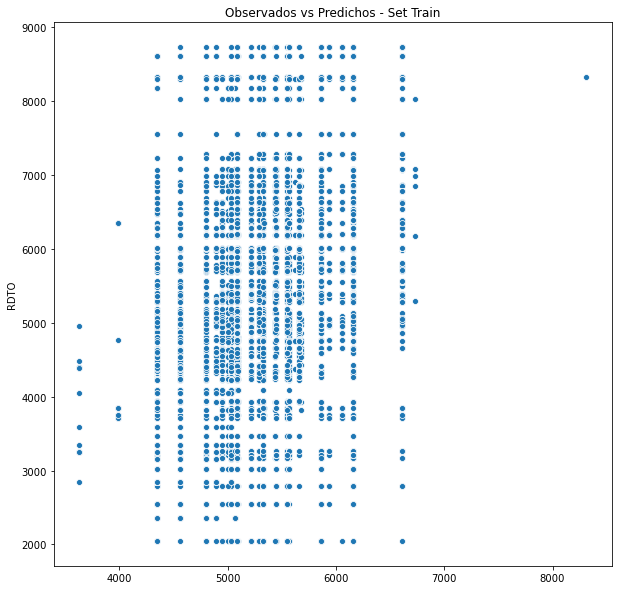

In [130]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_train_pred_best_modeldtr2,y=y_train)
plt.title("Observados vs Predichos - Set Train")

In [132]:
##### Random forest 2
rf3 = RandomForestRegressor(random_state=2)

rf3.fit(X_train, y_train)

RandomForestRegressor(random_state=2)

In [138]:
X_train

,Azul,Verde,InfraRojo,Borde rojo,Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdg,LNVI,GRVI,MGRVI
31427,55600,14260,55900,41620,20409,0.4650,0.1464,0.6976,0.3148,0.5935,3.9200,2.7389,1.3431,0.2949,-0.1773,-0.3439
9298,51800,11870,49700,29090,12483,0.5985,0.2615,0.8977,0.4370,0.6144,4.1870,3.9814,1.7084,0.5356,-0.0251,-0.0503
7919,52700,12970,45800,31330,16925,0.4603,0.1876,0.6905,0.4075,0.5586,3.5312,2.7060,1.4618,0.3797,-0.1322,-0.2600
23512,60900,14120,65700,36510,16918,0.5904,0.2855,0.8856,0.4836,0.6462,4.6529,3.8834,1.7995,0.5875,-0.0901,-0.1788
27292,62100,16310,73200,47950,20532,0.5618,0.2084,0.8428,0.3709,0.6355,4.4880,3.5651,1.5265,0.4230,-0.1145,-0.2262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,50500,12050,57600,30430,14972,0.5873,0.3086,0.8810,0.5254,0.6539,4.7800,3.8471,1.8928,0.6380,-0.1081,-0.2137
32103,57400,13150,57200,35770,18762,0.5060,0.2305,0.7590,0.4555,0.6261,4.3498,3.0487,1.5991,0.4694,-0.1758,-0.3411
30403,49400,12230,46100,32440,16406,0.4750,0.1739,0.7125,0.3661,0.5806,3.7694,2.8099,1.4210,0.3514,-0.1458,-0.2855
21243,53000,11170,43500,26560,14137,0.5094,0.2417,0.7641,0.4746,0.5913,3.8943,3.0770,1.6378,0.4933,-0.1172,-0.2313


In [133]:
### predict
y_train_pred_rf3 = rf3.predict(X_train)
y_test_pred_rf3 = rf3.predict(X_test)

### evaluate:
train_error_rf3 = mean_squared_error(y_train, y_train_pred_rf3)
test_error_rf3 = mean_squared_error(y_test, y_test_pred_rf3)

RMSE_train_error_rf3=math.sqrt(train_error_rf3)
RMSE_test_error_rf3=math.sqrt(test_error_rf3)

RMSEr_train_error_rf3=(RMSE_train_error_rf3/dataset["RDTO"].mean())
RMSEr_test_error_rf3=(RMSE_test_error_rf3/dataset["RDTO"].mean())


print(f'Train error: {train_error_rf3:.2f}')
print(f'Test error: {test_error_rf3:.2f}')

print(f'RMSE train:{RMSE_train_error_rf3:.2f}')
print(f'RMSE test:{RMSE_test_error_rf3:.2f}')

print(f'RMSE relativo test:{RMSEr_test_error_rf3:.2f}')
print(f'RMSE relativo train:{RMSEr_train_error_rf3:.2f}')

Train error: 177941.92
Test error: 1260166.28
RMSE train:421.83
RMSE test:1122.57
RMSE relativo test:0.21
RMSE relativo train:0.08


Text(0.5, 1.0, 'Observados vs Predichos - Set Train')

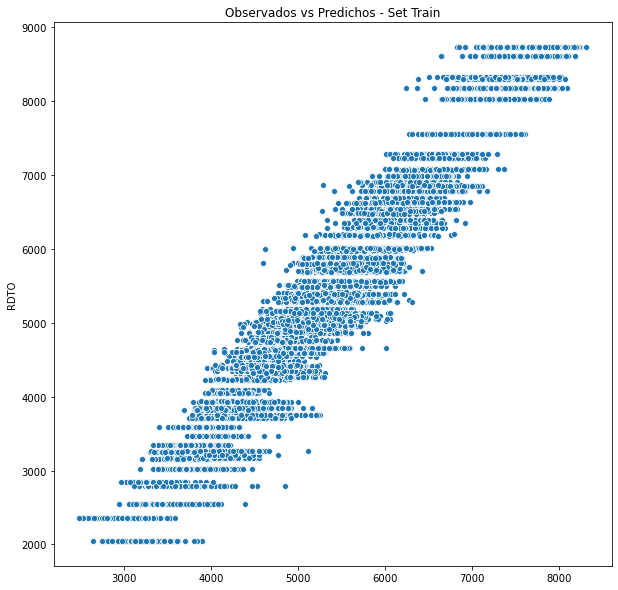

In [134]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_train_pred_rf3,y=y_train)
plt.title("Observados vs Predichos - Set Train")

Text(0.5, 1.0, 'Observados vs Predichos - Set Test')

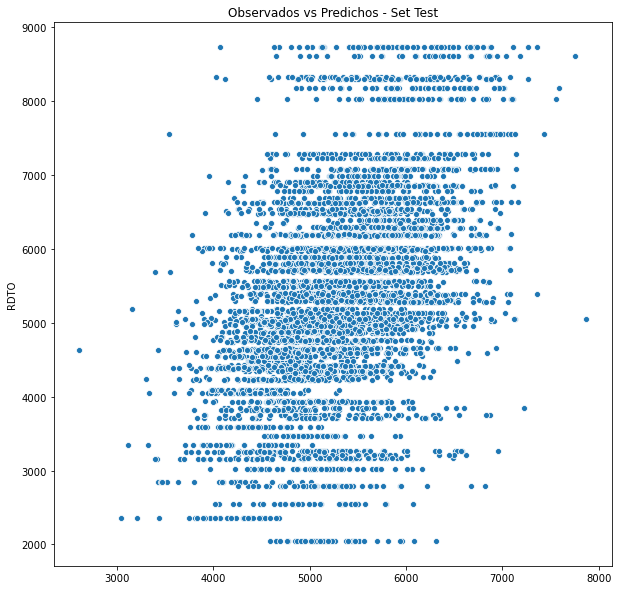

In [149]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test_pred_rf3,y=y_test)
plt.title("Observados vs Predichos - Set Test")

In [143]:
rf3.feature_importances_

array([0.10051644, 0.08565918, 0.05173717, 0.06714667, 0.08172861,
       0.03049918, 0.0519449 , 0.03133634, 0.10022328, 0.04342147,
       0.05983938, 0.0372686 , 0.09660358, 0.05971429, 0.04842092,
       0.05393998])

In [147]:
importancia2=pd.concat((pd.DataFrame(X_train.iloc[:, 0:].columns, columns = ['variable']), 
           pd.DataFrame(rf3.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values('importance',ascending=False)
importancia2

,variable,importance
0,Azul,0.100516
8,SCCI,0.100223
12,RedEdg,0.096604
1,Verde,0.085659
4,Rojo,0.081729
3,Borde rojo,0.067147
10,GVI,0.059839
13,LNVI,0.059714
15,MGRVI,0.053940
6,NDRE,0.051945


Index(['Azul', 'Verde', 'InfraRojo', 'Borde rojo', 'Rojo', 'NDVI', 'NDRE',
       'SAVI', 'SCCI', 'GNDVI', 'GVI', 'RVI', 'RedEdg', 'LNVI', 'GRVI',
       'MGRVI'],
      dtype='object')

###**2.4. Responder**

¿Qué diferencias hay entre los distintos modelos? ¿Qué tan buenas son las predicciones?

Jueguen un poco variando algunos parámetros (no es necesario hacer una búsqueda sistemática). ¿Qué parámetros influyen más en el desempeño de los modelos? ¿Por qué les parece que algunos parámetros influyen más que otros?

###**COMENTARIOS**

Los modelos de predicciones que se fueron probando en el practico presentaron unos RMSE relativos a la media de la variable respuesta (RDTO) aceptables, en algunos casos rondaron en 0.20 como la regresion lineal. En el caso de la regresion polinimica, este error disminuyo alrededor de  0.15. No hubo mucha diferencia entre los diferentes grados de los polinomios, el valor que menor error mostro fue un degree= 3. 
Se observo que usar solo un par de features, el error fue mayor que al usar todas las diponbiles. Esto se puede deber a que la interaccion entre ellas tengan la capacidad de explicar el rdto del cultivo.

Al usar el SDGRegression con la optimizacion de hiper parametros el error se mantuvo al mismo nivel que se estaba observando, un 0.28. 

Con el Arbol de regresion se pudo reducir mucho el RMSEr, consideramos que uno de los parametros mas importante es el max_detph que es la profundidad del mismo, ya que si esto esta en none, el arbol se extiende hasta que todas las hojas sean puras pero el arbol muy dificl de entender, y si es un valor muy chico las hojas o nodos finales van a presentar mucha heterogeinedad dentro de ellas y el error va a aumentar. En el caso de los resultados del arbol, pudimos observar los predichos vs los valores reales de rdto y vemos que hay una fuerte correlacion,y que el modelo tiende a confundir los valores bajos e intermedios.

Al observar la importancia de las variables, segun el random forest, las variable mas importantes para predicir el rendimiento son:T.suelo.max.Espig y la HR.prom.Espig, ambas variables son de la base climatica. En cuanto al objetivo del trabajo en general, predecir segun los valores obtenidos de las imagenes de drones, no se presentaron valores altos de importancia. 





###**2.5.Normalizando los datos de entrada**
 (pueden usar, por ejemplo MinMaxScaler o StandardScaler). ¿Hay alguna diferencia en el resultado de los modelos? ¿A qué se debe?
 
###**COMENTARIOS**

Al normalizar los datos, solo en SGDRegression presento resultados diferentes, siendo mejor en el modelo con datos de entrada normalizados. 

Finalmente, intenten mejorar las predicciones agregando o quitando features, o variando el tipo de encoding. En base a los resultados que vayan obteniendo, determinen los features que ustedes consideren que son más informativos (aquellos que ayudan a mejorar la predicción) y aquellos que sean redundantes, o que empeoren el resultado.

###**COMENTARIOS**

Con las features derivadas de las imagenes, es decir las bandas y el diferentes indices, los diferentes modelos arrogan RMSE relativo a la media de 0.20 - 0.25, consideramos que no son malas las predicciones. Se pueden mejorar como vimos antes con los valores climaticos. 

###**3.Opcional**

###**3.1. Multinomial Naives Bayes**